In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import train_test_split


import logging
import pandas as pd
import numpy as np

import mlflow
mlflow.set_tracking_uri("http://mlflow_server:5000/")
mlflow.set_experiment("/archimedes-ml")
# enable autologging
mlflow.sklearn.autolog()

In [2]:
score = 'accuracy'

dataset = pd.read_csv("/data/elekin/data/results/handwriting/tmp/windowed_data.csv") #TODO automate
dataset = dataset.set_index(dataset.columns[0])
print("Loaded data from CSV")
dataset.head(10)

Loaded data from CSV


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,labels
subject_id,,,,,,,,,,,,,,,,,,,,,
C01_11,25.169809,25.285464,25.397034,25.503591,25.603848,25.699494,25.793318,25.885480,25.973626,26.056153,...,27.201314,27.182732,27.160245,27.133616,27.101177,27.061794,27.015405,26.961872,26.900448,ct
C01_11,25.285464,25.397034,25.503591,25.603848,25.699494,25.793318,25.885480,25.973626,26.056153,26.133454,...,27.182732,27.160245,27.133616,27.101177,27.061794,27.015405,26.961872,26.900448,26.830790,ct
C01_11,25.397034,25.503591,25.603848,25.699494,25.793318,25.885480,25.973626,26.056153,26.133454,26.206258,...,27.160245,27.133616,27.101177,27.061794,27.015405,26.961872,26.900448,26.830790,26.753849,ct
C01_11,25.503591,25.603848,25.699494,25.793318,25.885480,25.973626,26.056153,26.133454,26.206258,26.274762,...,27.133616,27.101177,27.061794,27.015405,26.961872,26.900448,26.830790,26.753849,26.671209,ct
C01_11,25.603848,25.699494,25.793318,25.885480,25.973626,26.056153,26.133454,26.206258,26.274762,26.339569,...,27.101177,27.061794,27.015405,26.961872,26.900448,26.830790,26.753849,26.671209,26.583609,ct
C01_11,25.699494,25.793318,25.885480,25.973626,26.056153,26.133454,26.206258,26.274762,26.339569,26.401853,...,27.061794,27.015405,26.961872,26.900448,26.830790,26.753849,26.671209,26.583609,26.490651,ct
C01_11,25.793318,25.885480,25.973626,26.056153,26.133454,26.206258,26.274762,26.339569,26.401853,26.461969,...,27.015405,26.961872,26.900448,26.830790,26.753849,26.671209,26.583609,26.490651,26.392139,ct
C01_11,25.885480,25.973626,26.056153,26.133454,26.206258,26.274762,26.339569,26.401853,26.461969,26.518937,...,26.961872,26.900448,26.830790,26.753849,26.671209,26.583609,26.490651,26.392139,26.289169,ct
C01_11,25.973626,26.056153,26.133454,26.206258,26.274762,26.339569,26.401853,26.461969,26.518937,26.571893,...,26.900448,26.830790,26.753849,26.671209,26.583609,26.490651,26.392139,26.289169,26.183411,ct


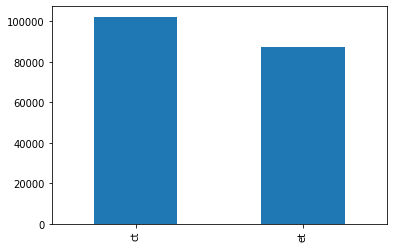

In [3]:
_=dataset['labels'].value_counts().plot.bar()

In [4]:
le = LabelEncoder().fit(dataset.labels)
logging.info("Classes {}".format(le.classes_))
y = LabelEncoder().fit_transform(dataset.labels)

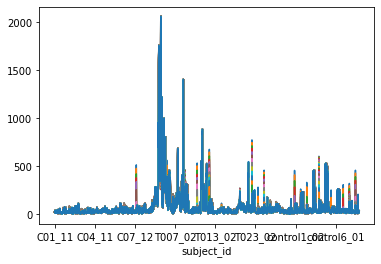

In [5]:
X = dataset.drop("labels", axis=1)
_=X.plot(legend=False)
X=X.values

In [6]:
X.shape

(189550, 51)

In [7]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
model_switcher = {
    'lda': LDA(),
    'svm': SVC(kernel='rbf', gamma=0.2, C=10**3),
    'random_forest': RandomForestClassifier(n_estimators=30),
    'knn': KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', metric='euclidean')
}

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=100)
model = model_switcher['knn']
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

2021/10/18 23:49:14 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'eb614ac8ac414fb493a339d88bb7f67a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
